# Obtención de datos

- Extraer imagenes para entrenar modelo de reconocimiento de dígitos.
- La imágenes se extrajeron de la pagina web, de la cual se recuperó información

## 1. Configurar entorno

In [2]:
# Cargar librerías.
# Scraping
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from fake_useragent import UserAgent

# Credenciales, urls
import keys as k
import custom_vars

# Extracción de texto
import cv2
import pytesseract as tes
import re
import pandas as pd

import time
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Definir parámetros
# Directorio o path donde se encuentra el ejecutable de pytesseract
path_tesseract_exe = custom_vars.path_tesseract_exe
# Página principal con la data
url = custom_vars.url 
# Abrir la página web
# Setear opciones de enmascaramiento
options = webdriver.ChromeOptions();
#Enmascarar fuente de salida de la consulta.
#headers = {"user-agent": k.user_agent}
userAgent = (UserAgent()).random
options.add_argument(f'user-agent={userAgent}')
#options.add_argument('user-agent':'{}'.format(k.user_agent))
options.add_argument('--incognito')
# Configurar el driver que abrirá la web
driver = webdriver.Chrome('chromedriver', chrome_options=options)
# Abrir la web
driver.get(url)
time.sleep(1)
# Cerrar mensaje emergente
driver.find_element_by_xpath("//*[@class = 'close']").click()
time.sleep(1)


## 2. Funciones desarrolladas

In [4]:
# Función para encontrar captcha, preprocesarlo y salvarlo.
def get_images(driver,i):
    # Tomar scrremshot y guardarlo
    driver.save_screenshot('images2/image_{}.png'.format(str(i)))
    # Cargar imagen y quedarse solamente con el área de interés.
    image = cv2.imread('images2/image_{}.png'.format(str(i), 1))
    # Recortar área de interés
    image = image[485:540, 330:480]
    cv2.imwrite('images2/image_{}.png'.format(str(i)), image)

    
def get_captcha(image, path_tesseract_exe):
    # Cargar imagen.
    img = cv2.imread(f'images/image_{image}.png', 1)
    # Convertir imagen a texto
    tes.pytesseract.tesseract_cmd = path_tesseract_exe
    text = tes.image_to_string(img)
    # Descifrar captcha.
    #captcha = int(re.sub('[a-zA-Z]', '', re.sub('[^\w\s]','',text)).strip())
    captcha = re.sub('[a-zA-Z]', '', re.sub('[^\w\s]','',text).strip()).strip()
    return captcha

## 3. Extracción de imágenes

In [5]:
# Generar un dataset de 1000 imágenes
for i in range(0,1001):
    try:
        get_images(driver,i)
        driver.find_element_by_xpath("//*[@class = 'refrescar']").click() # Actualizar página después de salvar imagen
        time.sleep(2)
    except:
        print('error')
        driver.find_element_by_xpath("//*[@class = 'refrescar']").click()
        time.sleep(2)
driver.quit()

## 4. Etiquetar imágenes

In [39]:
import os
anotaciones = []
for image in range(1,1001,1):
    #print(image)
    label = get_captcha(image, path_tesseract_exe)
    #print(tmp)
    anotaciones.append({'image':'image' + '_' + str(image),'label':label})

In [40]:
pd.DataFrame(anotaciones)

,image,label
0,image_1,7
1,image_2,852
2,image_3,213
3,image_4,685
4,image_5,
...,...,...
995,image_996,
996,image_997,
997,image_998,852
998,image_999,651


In [41]:
# Guardar data
pd.DataFrame(anotaciones).to_csv('anotaciones_pytesseract_original.csv', index = False)
#pd.DataFrame(anotaciones).to_csv('anotaciones.csv', index = False)

Finalmente se verificó y corrigió las imágenes que Pyteseract no etiquetó bien.

Caso de la imagen 1:  

|                 |       |
|-----------------|-------|
| **imagen**      |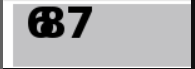|
| **label pytesseract** |   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  |
| **label corregido**  |   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;687&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   |